<a href="https://colab.research.google.com/github/battistabiggio/ai4dev/blob/main/notebooks/AI4Dev_02_data_visualization_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data sampling, visualization, learning and classification


For this tutorial, we will be using some libraries that are created for Machine Learning and data visualization.

- data analysis and machine learning: [`scikit-learn`](https://scikit-learn.org/stable/) / (a.k.a. `sklearn`)
- visualization: [`matplotlib`](https://matplotlib.org/stable/)

Let's start from a simple dataset created with scikit-learn.

We will start from a [random blobs dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Let's create the dataset and inspect its characteristics. We will create blobs of samples that are centered in specific points.

In [ ]:
from sklearn import datasets

samples, labels = datasets.make_blobs(
    n_samples = 100,  # generate 100 samples
    n_features = 2,  # each sample has 2 features
    centers = [[-1, -1], [1, 1]]
)

print(samples.shape, labels.shape)

(100, 2) (100,)


In [ ]:
print(samples[:5], labels[:5])

[[-0.97940642 -2.23908149]
 [-1.67964075  0.13574833]
 [ 2.19293816  2.35073614]
 [-0.71197516 -1.41335281]
 [-1.50044718  2.26403382]] [0 0 1 0 1]


As you see, if we create samples with sklearn, the data has specific shapes.

In machine learning applications, in general, the first index is reserved to the sample index. For this reason, we have 100 rows in our `samples` matrix. Since we created the dataset with two features, we have 2 columns in our matrix.

As for the labels, you can see that the array has only two possible values. These correspond to the class of the points (this is indeed a classification problem). This means that if the sample comes from the distribution labeled as `0`, it will be likely closer to the first center specified. Remember that this is not certain, as these are Gaussian distributions (it means that is unlikely, but the point can also come from the other distribution - just with lower probability).

Let's now visualize the points. We have to define a function that extracts the samples from each of the two classes separately, and then visualize them. Since the data are 2-dimensional, we can visualize them in a scatter plot where we represent each feature in one separate axis.

To plot samples, we can use the function scatter from `matplotlib.pyplot`.

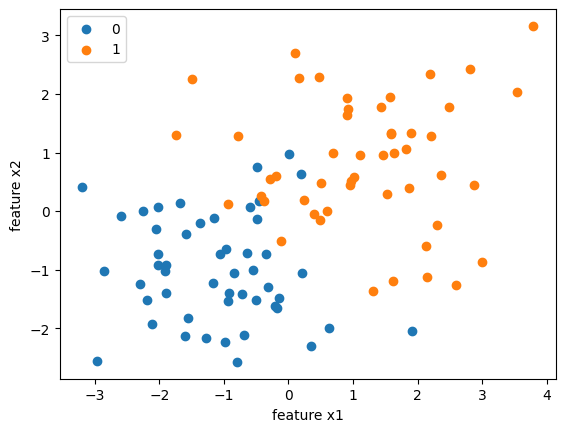

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_dataset(x, y):
    # setup color map with default colors from matplotlib
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    # Colormap object generated from a list of colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])

    available_classes = np.unique(y)  # takes the unique elements
    for c in sorted(available_classes):
        samples_from_class = x[y==c]
        x_coords = samples_from_class[:, 0]
        y_coords = samples_from_class[:, 1]
        plt.scatter(x_coords, y_coords, label=str(c), color=colors[c])  # plots also sets of points
    plt.xlabel('feature x1')
    plt.ylabel('feature x2')
    plt.legend()

plot_dataset(samples, labels)

As you can see, the distributions are centered in the specified centers. Now, our classification problem will be to classify new points that don't belong to this dataset (thus they are not labeled).

## Learning and classification

Now we can sample data and visualize it in two dimensions.

- The goal of the next exercises is to train a simple classifier
- We will use a simple linear classifier
- Then we will use its learning and classification methods

During the learning phase, our classifier is given a training set consisting of pairs (x, y) of
samples along with their labels

During classification, the classifiers assigns the current test sample x to one of the classes

We will use the functions:
- `fit(x,y)`, corresponding to the learning phase, and
- `predict(x)`, corresponding to the classification phase




[[0.40884267 0.44167283]]
Predicted: 0


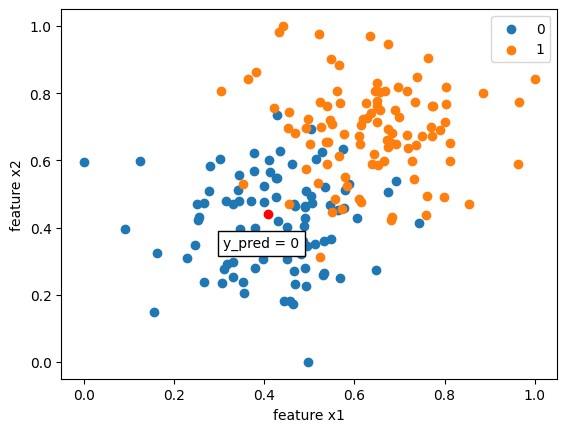

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

samples, labels = datasets.make_blobs(
    n_samples = 200,  # generate 100 samples
    n_features = 2,  # each sample has 2 features
    centers = [[-1, -1], [1, 1]]
)

# Support Vector Classifier
classifier = SVC(kernel='linear')
normalizer = MinMaxScaler()

# normalize the data
samples = normalizer.fit_transform(samples)

# train the classifier
classifier.fit(samples, labels)


# test point
x0 = np.array([-0.95, -0.8])

# transform the sample and predict
x0 = normalizer.transform([x0])
print(x0)
y_pred = classifier.predict(x0)

plot_dataset(samples, labels)
plt.scatter(x0[0, 0], x0[0, 1], color='red')
plt.text(x0[0, 0] - 0.1, x0[0, 1] - 0.1, f"y_pred = {y_pred.item()}",
         bbox=dict(facecolor='white'))

print("Predicted:", y_pred.item())

## Visualizing the decision regions of a classifier

With matplotlib, we can also visualize the decision regions of the classifier, i.e., the prediction for all points of the feature space.

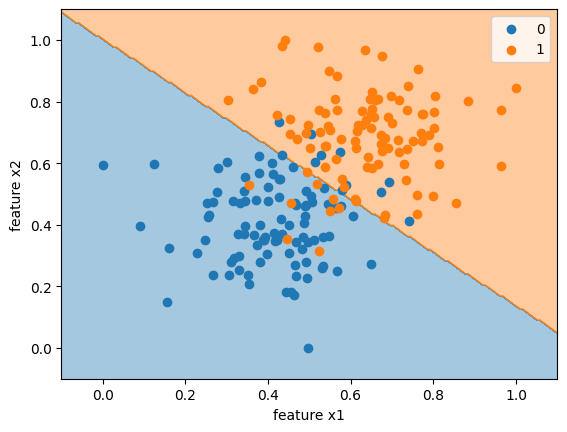

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, num_points):
    # setup color map with default colors from matplotlib
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    # Colormap object generated from a list of colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # get maximum and minimum value for each feature (with a bit of margin)
    margin = 0.1
    x1_min, x1_max = x[:, 0].min() - margin, x[:, 0].max() + margin
    x2_min, x2_max = x[:, 1].min() - margin, x[:, 1].max() + margin

    # create coordinate matrices from coordinate vectors
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, num_points),
        np.linspace(x2_min, x2_max, num_points))

    # get color value for each coordinate (as feature 1 and feature 2)
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # shape again as a grid
    z = z.reshape(xx1.shape)

    # plot the colors
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)

    # set plot limits
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    plot_dataset(x,y)

    return

plot_decision_regions(samples, labels, classifier, 200)

Now let's try it with more complicated datasets and more samples.

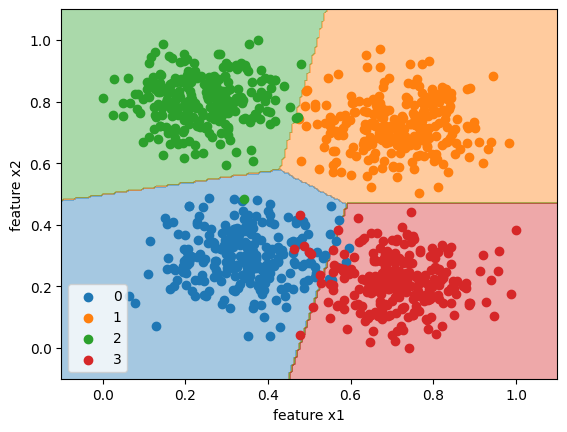

In [ ]:
samples, labels = datasets.make_blobs(
    n_samples = 1000,  # generate 100 samples
    n_features = 2,  # each sample has 2 features
    centers = [[-1, -3], [3, 2], [-2, 3], [3, -4]]
)

classifier = SVC(kernel='linear')
samples = normalizer.fit_transform(samples)
classifier.fit(samples, labels)
plot_decision_regions(samples, labels, classifier, num_points=200)


## Testing performances on unseen data

To assess classifier performance, one should estimate the classification error on never-
before-seen data

- The training data should not be used to this end, as it provides an optimistic estimate of the
real performance!

Therefore, the correct procedure amounts to:
1. Sampling a training and a testing set (from the same underlying distribution), e.g., with
our data generation class from sklearn
2. Fitting the classifier on training data
3. Predicting the class labels of testing data
4. Evaluating the fraction of wrong predictions

We will slightly modify the process by using the sklearn APIs for splitting the dataset into training and testing set. Thus, we sample once all the data and then we split in two sub-datasets later. The rest of the process remains the same.


Text(0.02, 0.02, 'Test. Acc.: 98.4%')

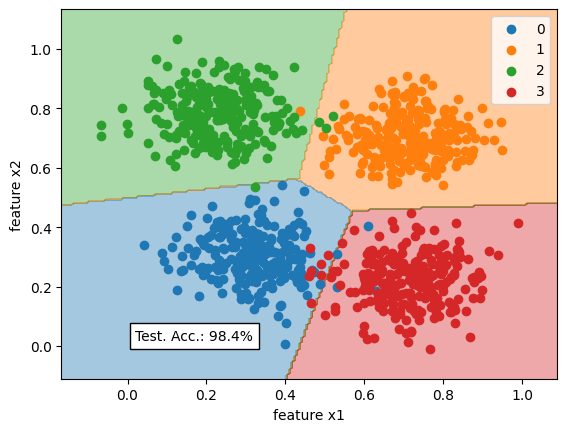

In [ ]:
x_train, y_train = datasets.make_blobs(
    n_samples = 1000,  # generate 100 samples
    n_features = 2,  # each sample has 2 features
    centers = [[-1, -3], [3, 2], [-2, 3], [3, -4]])
x_test, y_test = datasets.make_blobs(
    n_samples = 1000,  # generate 100 samples
    n_features = 2,  # each sample has 2 features
    centers = [[-1, -3], [3, 2], [-2, 3], [3, -4]])


classifier = SVC(kernel='linear')
normalizer = MinMaxScaler()

x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

def compute_accuracy(y_true, y_pred):
    return (y_pred == y_true).mean()

accuracy = compute_accuracy(y_test, predictions)

plot_decision_regions(x_test, y_test, classifier, num_points=200)
plt.text(0.02, 0.02, "Test. Acc.: {:.1%}".format(accuracy),
        bbox=dict(facecolor='white'))


Lessons learned
- Visualizing data and decision regions
- Using a simple classifier (using a sklearn class)
- Basic estimation of classifier performance on unseen data

